YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 17s 193ms/step - loss: 0.0145 - val_loss: 0.0012
Epoch 2/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 13s 62ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 3/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 4/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 5/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 6/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 0.0010 - val_loss: 9.6999e-04
Epoch 7/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 9.0201e-04 - val_loss: 0.0014
Epoch 8/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - loss: 8.2377e-04 - val_loss: 0.0013
Epoch 9/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 8.6063e-04 - val_loss: 0.0011
Epoch 10/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 7.8230e-04 - val_loss: 0.0020
Epoch 11/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 12/20
55/55 ━━━━━━━━━━━━━━━━━━━━ 4

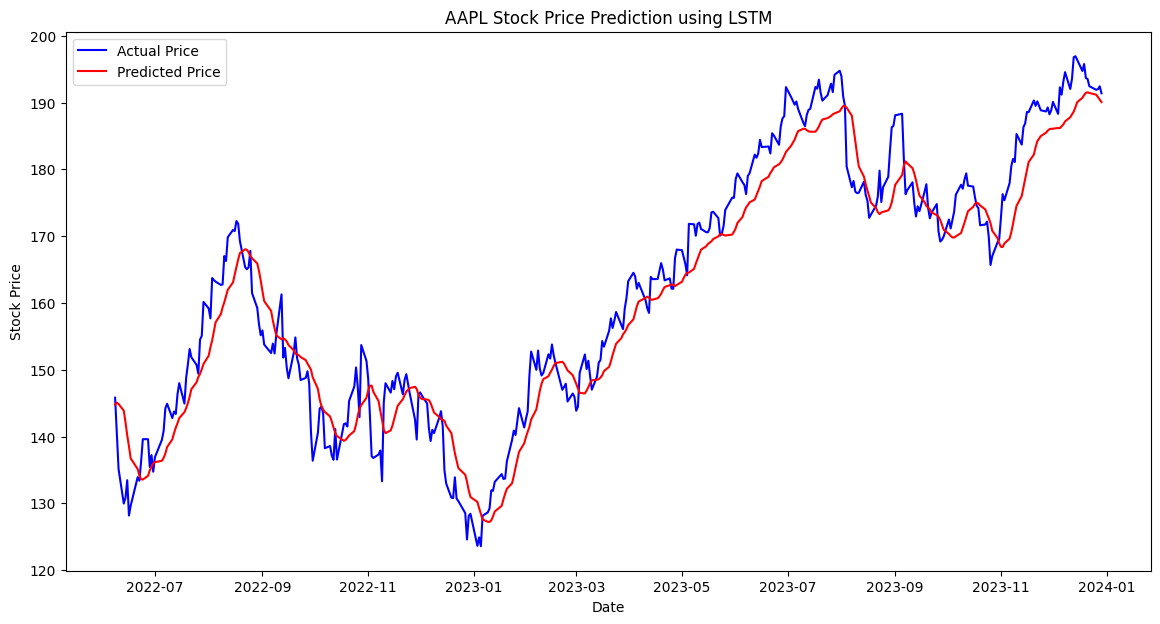

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load Stock Data (Example: Apple 'AAPL')
stock_symbol = 'AAPL'
df = yf.download(stock_symbol, start="2015-01-01", end="2024-01-01")

# Prepare Closing Price Data
data = df[['Close']].values

# Normalize Data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Split into Training and Testing Sets
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# Function to Create Sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 60  # 60 days of past data to predict the next day's price
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Reshape Data for LSTM Model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build LSTM Model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=25),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Train the Model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Make Predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Convert back to original scale

# Adjust the index length to match predictions
plt.figure(figsize=(14,7))
plt.plot(df.index[-len(predictions):], df['Close'].values[-len(predictions):], label='Actual Price', color='blue')
plt.plot(df.index[-len(predictions):], predictions.flatten(), label='Predicted Price', color='red')  # Flatten predictions
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title(f'{stock_symbol} Stock Price Prediction using LSTM')
plt.legend()
plt.show()